# OG Ski-Rental Experiments

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read entire df

In [2]:
# Read csv
frames = []

for other_user_strategy in ["RANDOM", "UNIFORM", "A-ADAPTED"]:
    for trend in ["None", "VET-up", "VET-down"]:
    # for trend in ["STABLE-LARGE", "UP-LARGE", "DOWN-LARGE"]:
        df_temp = pd.read_csv(
            f"Model/Experiments/mas/output/data/1000_price_trend/MAS_a-adapted_{other_user_strategy}_{trend}.csv")
        df_temp["price_trend"] = trend
        frames.append(df_temp)

df = pd.concat(frames)
keep_columns = ["RunId", "main_user_strategy", "user_strategies", "price_trend", "AgentID", "state", "bought_at_day", "max_days", "initial_buy_price",
                "potential_FIAT_spent_rent", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR"]
df = df[keep_columns]
df = df.reset_index()

adoption_velocity = 7300 / np.array(df["bought_at_day"])
df["adoption_velocity"] = adoption_velocity
df


C:\Users\Boris\AppData\Local\Temp/ipykernel_20492/1503026806.py:27: RuntimeWarning: divide by zero encountered in true_divide
  adoption_velocity = 7300 / np.array(df["bought_at_day"])


,index,RunId,main_user_strategy,user_strategies,price_trend,AgentID,state,bought_at_day,max_days,initial_buy_price,potential_FIAT_spent_rent,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR,adoption_velocity
0,0,0,A-ADAPTED,RANDOM,None,1,BOUGHT,1140,2184,4.060017e+09,1.855295e+10,4.026778e+09,4.055980e+09,4.060017e+09,1.990818,6.403509
1,1,0,A-ADAPTED,RANDOM,None,2,RENTING,0,1930,4.058397e+09,1.432144e+10,1.432144e+10,0.000000e+00,4.058397e+09,1.990818,inf
2,2,0,A-ADAPTED,RANDOM,None,3,RENTING,0,2018,4.058979e+09,1.576542e+10,1.576542e+10,0.000000e+00,4.058979e+09,1.990818,inf
3,3,0,A-ADAPTED,RANDOM,None,4,RENTING,0,2490,4.061386e+09,2.393551e+10,2.393551e+10,0.000000e+00,4.061386e+09,1.990818,inf
4,4,1,A-ADAPTED,RANDOM,None,1,BOUGHT,1204,6776,4.057995e+09,4.662044e+10,4.035513e+09,4.058596e+09,4.057995e+09,1.994608,6.063123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,39995,9998,A-ADAPTED,A-ADAPTED,VET-down,4,RENTING,0,1097,4.058035e+09,2.144716e+09,2.144716e+09,0.000000e+00,2.144716e+09,1.000000,inf
359996,39996,9999,A-ADAPTED,A-ADAPTED,VET-down,1,BOUGHT,2579,5127,4.057833e+09,5.263737e+10,1.924318e+10,1.864130e+10,4.057833e+09,9.336137,2.830554
359997,39997,9999,A-ADAPTED,A-ADAPTED,VET-down,2,BOUGHT,1459,6796,4.054167e+09,7.450214e+10,6.608104e+09,6.567462e+09,4.054167e+09,9.336137,5.003427
359998,39998,9999,A-ADAPTED,A-ADAPTED,VET-down,3,BOUGHT,1729,5014,4.055884e+09,5.115546e+10,9.297651e+09,9.327519e+09,4.055884e+09,9.336137,4.222094


### Max CR per algorithm

In [3]:
df.groupby(["user_strategies", "price_trend"])["main_user_CR"].max()

user_strategies  price_trend
A-ADAPTED        None            7.479660
                 VET-down       10.484193
                 VET-up         11.927225
RANDOM           None            7.475247
                 VET-down        9.668148
                 VET-up         17.920475
UNIFORM          None            5.653337
                 VET-down       10.748595
                 VET-up         14.615816
Name: main_user_CR, dtype: float64

### Mean CR per algorithm

In [4]:
df.groupby(["user_strategies", "price_trend"])["main_user_CR"].mean()

user_strategies  price_trend
A-ADAPTED        None           3.387583
                 VET-down       3.211556
                 VET-up         4.503019
RANDOM           None           2.502264
                 VET-down       2.123524
                 VET-up         3.812917
UNIFORM          None           3.213998
                 VET-down       2.873828
                 VET-up         5.502286
Name: main_user_CR, dtype: float64

### Violin plot

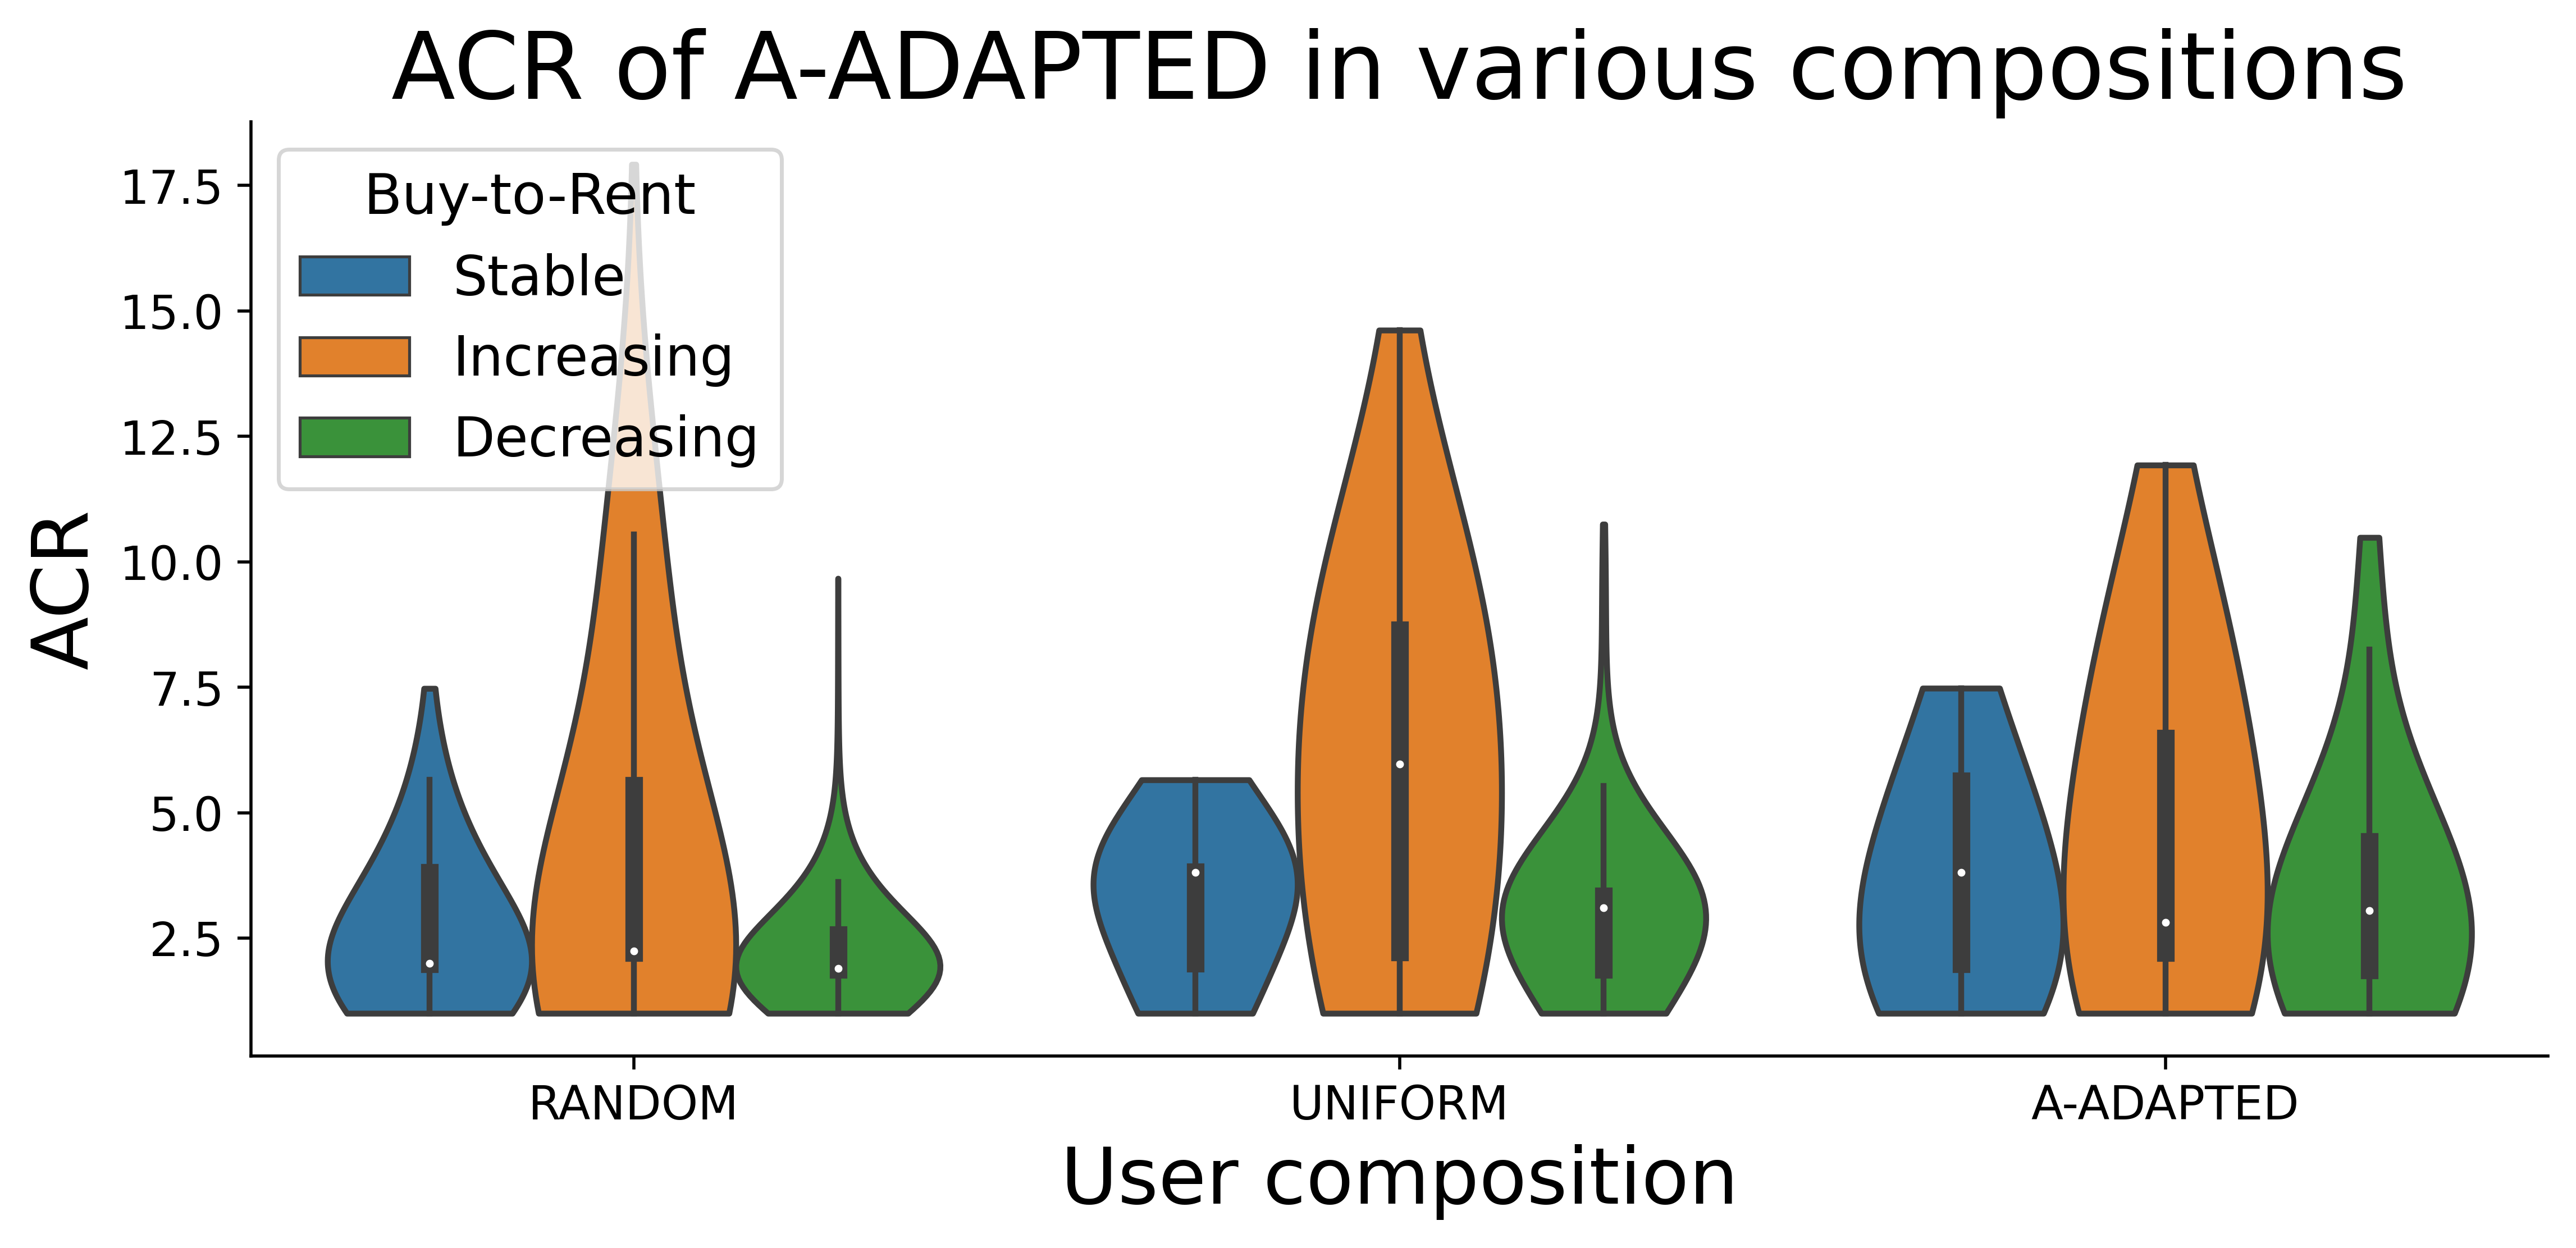

In [5]:
# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

_user_strategies = ["RANDOM", "KEEP-RENTING","DET", "RAND", "A-ADAPTED"]
_user_strategy = "A-ADAPTED"

# Set title
plt.title(
    f"ACR of {_user_strategy} in various compositions", fontsize=24)

# Select strategy
_df_temp = df

# Plot
sns.violinplot(ax=ax, x="user_strategies", y="main_user_CR", hue="price_trend", data=_df_temp, bw=1,  cut=0, scale="width", alpha=0.4)

# Set labels etc.
ax.set_ylabel('ACR', fontsize=20)
ax.set_xlabel('User composition', fontsize=20)
# ax.set_ylim(0,20)

labels = ["Stable", "Increasing", "Decreasing"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, fontsize=14, title="Buy-to-Rent")

sns.despine(offset=0, trim=False, left=False)

plt.savefig("Model/Experiments/mas/output/img/mas-CR.pdf",
            format="pdf", bbox_inches="tight")

plt.savefig("Presentation/MAS-CR-violin.png",
            format="png", bbox_inches="tight")


### Adoption ratio

In [6]:
_df_tmp = df[df["AgentID"] == 1].groupby(["user_strategies", "price_trend", "state"]).size()
_df_tmp = pd.DataFrame(_df_tmp).reset_index()
_df_tmp.columns = ["user_strategies", "usage_trend", "state", "count"]
_df_tmp = _df_tmp[_df_tmp["state"] == "BOUGHT"]
_df_tmp["adoption_ratio"] = _df_tmp["count"]/1000
_df_tmp


,user_strategies,usage_trend,state,count,adoption_ratio
0,A-ADAPTED,None,BOUGHT,7613,7.613
2,A-ADAPTED,VET-down,BOUGHT,7618,7.618
4,A-ADAPTED,VET-up,BOUGHT,7313,7.313
6,RANDOM,None,BOUGHT,7899,7.899
8,RANDOM,VET-down,BOUGHT,8141,8.141
10,RANDOM,VET-up,BOUGHT,7329,7.329
12,UNIFORM,None,BOUGHT,7562,7.562
14,UNIFORM,VET-down,BOUGHT,7778,7.778
16,UNIFORM,VET-up,BOUGHT,6771,6.771


### All Random

In [10]:
# Read csv
frames_random = []

for other_user_strategy in ["RANDOM"]:
    for trend in ["None", "VET-up","VET-down"]:
        df_temp = pd.read_csv(
            f"Model/Experiments/mas/output/data/10000_random/MAS_random_{other_user_strategy}_{trend}.csv")
        df_temp["price_trend"] = trend
        frames.append(df_temp)

df_random = pd.concat(frames)

keep_columns = ["RunId", "main_user_strategy", "user_strategies", "price_trend", "AgentID", "state", "bought_at_day", "max_days", "initial_buy_price",
                "potential_FIAT_spent_rent", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR"]
df_random = df_random[keep_columns]


df_random = df_random.reset_index()
df_random


,index,RunId,main_user_strategy,user_strategies,price_trend,AgentID,state,bought_at_day,max_days,initial_buy_price,potential_FIAT_spent_rent,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR
0,0,0,A-ADAPTED,RANDOM,None,1,BOUGHT,1140,2184,4.060017e+09,1.855295e+10,4.026778e+09,4.055980e+09,4.060017e+09,1.990818
1,1,0,A-ADAPTED,RANDOM,None,2,RENTING,0,1930,4.058397e+09,1.432144e+10,1.432144e+10,0.000000e+00,4.058397e+09,1.990818
2,2,0,A-ADAPTED,RANDOM,None,3,RENTING,0,2018,4.058979e+09,1.576542e+10,1.576542e+10,0.000000e+00,4.058979e+09,1.990818
3,3,0,A-ADAPTED,RANDOM,None,4,RENTING,0,2490,4.061386e+09,2.393551e+10,2.393551e+10,0.000000e+00,4.061386e+09,1.990818
4,4,1,A-ADAPTED,RANDOM,None,1,BOUGHT,1204,6776,4.057995e+09,4.662044e+10,4.035513e+09,4.058596e+09,4.057995e+09,1.994608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,39995,9998,RANDOM,RANDOM,VET-down,4,RENTING,0,7292,3.032070e+09,2.080283e+10,2.080283e+10,0.000000e+00,3.032070e+09,1.000000
479996,39996,9999,RANDOM,RANDOM,VET-down,1,BOUGHT,1091,3508,3.033602e+09,4.969684e+09,5.241194e+08,4.224472e+09,3.033602e+09,1.565331
479997,39997,9999,RANDOM,RANDOM,VET-down,2,BOUGHT,264,5613,3.031631e+09,1.285973e+10,1.513203e+07,3.011237e+09,3.031631e+09,1.565331
479998,39998,9999,RANDOM,RANDOM,VET-down,3,BOUGHT,3925,6629,3.031589e+09,1.726426e+10,6.260605e+09,8.244904e+09,3.031589e+09,1.565331


In [11]:
df_random.groupby(["main_user_strategy","user_strategies", "price_trend"])["main_user_CR"].mean()


main_user_strategy  user_strategies  price_trend
A-ADAPTED           A-ADAPTED        None           3.387583
                                     VET-down       3.211556
                                     VET-up         4.503019
                    RANDOM           None           2.502264
                                     VET-down       2.123524
                                     VET-up         3.812917
                    UNIFORM          None           3.213998
                                     VET-down       2.873828
                                     VET-up         5.502286
RANDOM              RANDOM           None           3.627601
                                     VET-down       3.893258
                                     VET-up         4.137512
Name: main_user_CR, dtype: float64

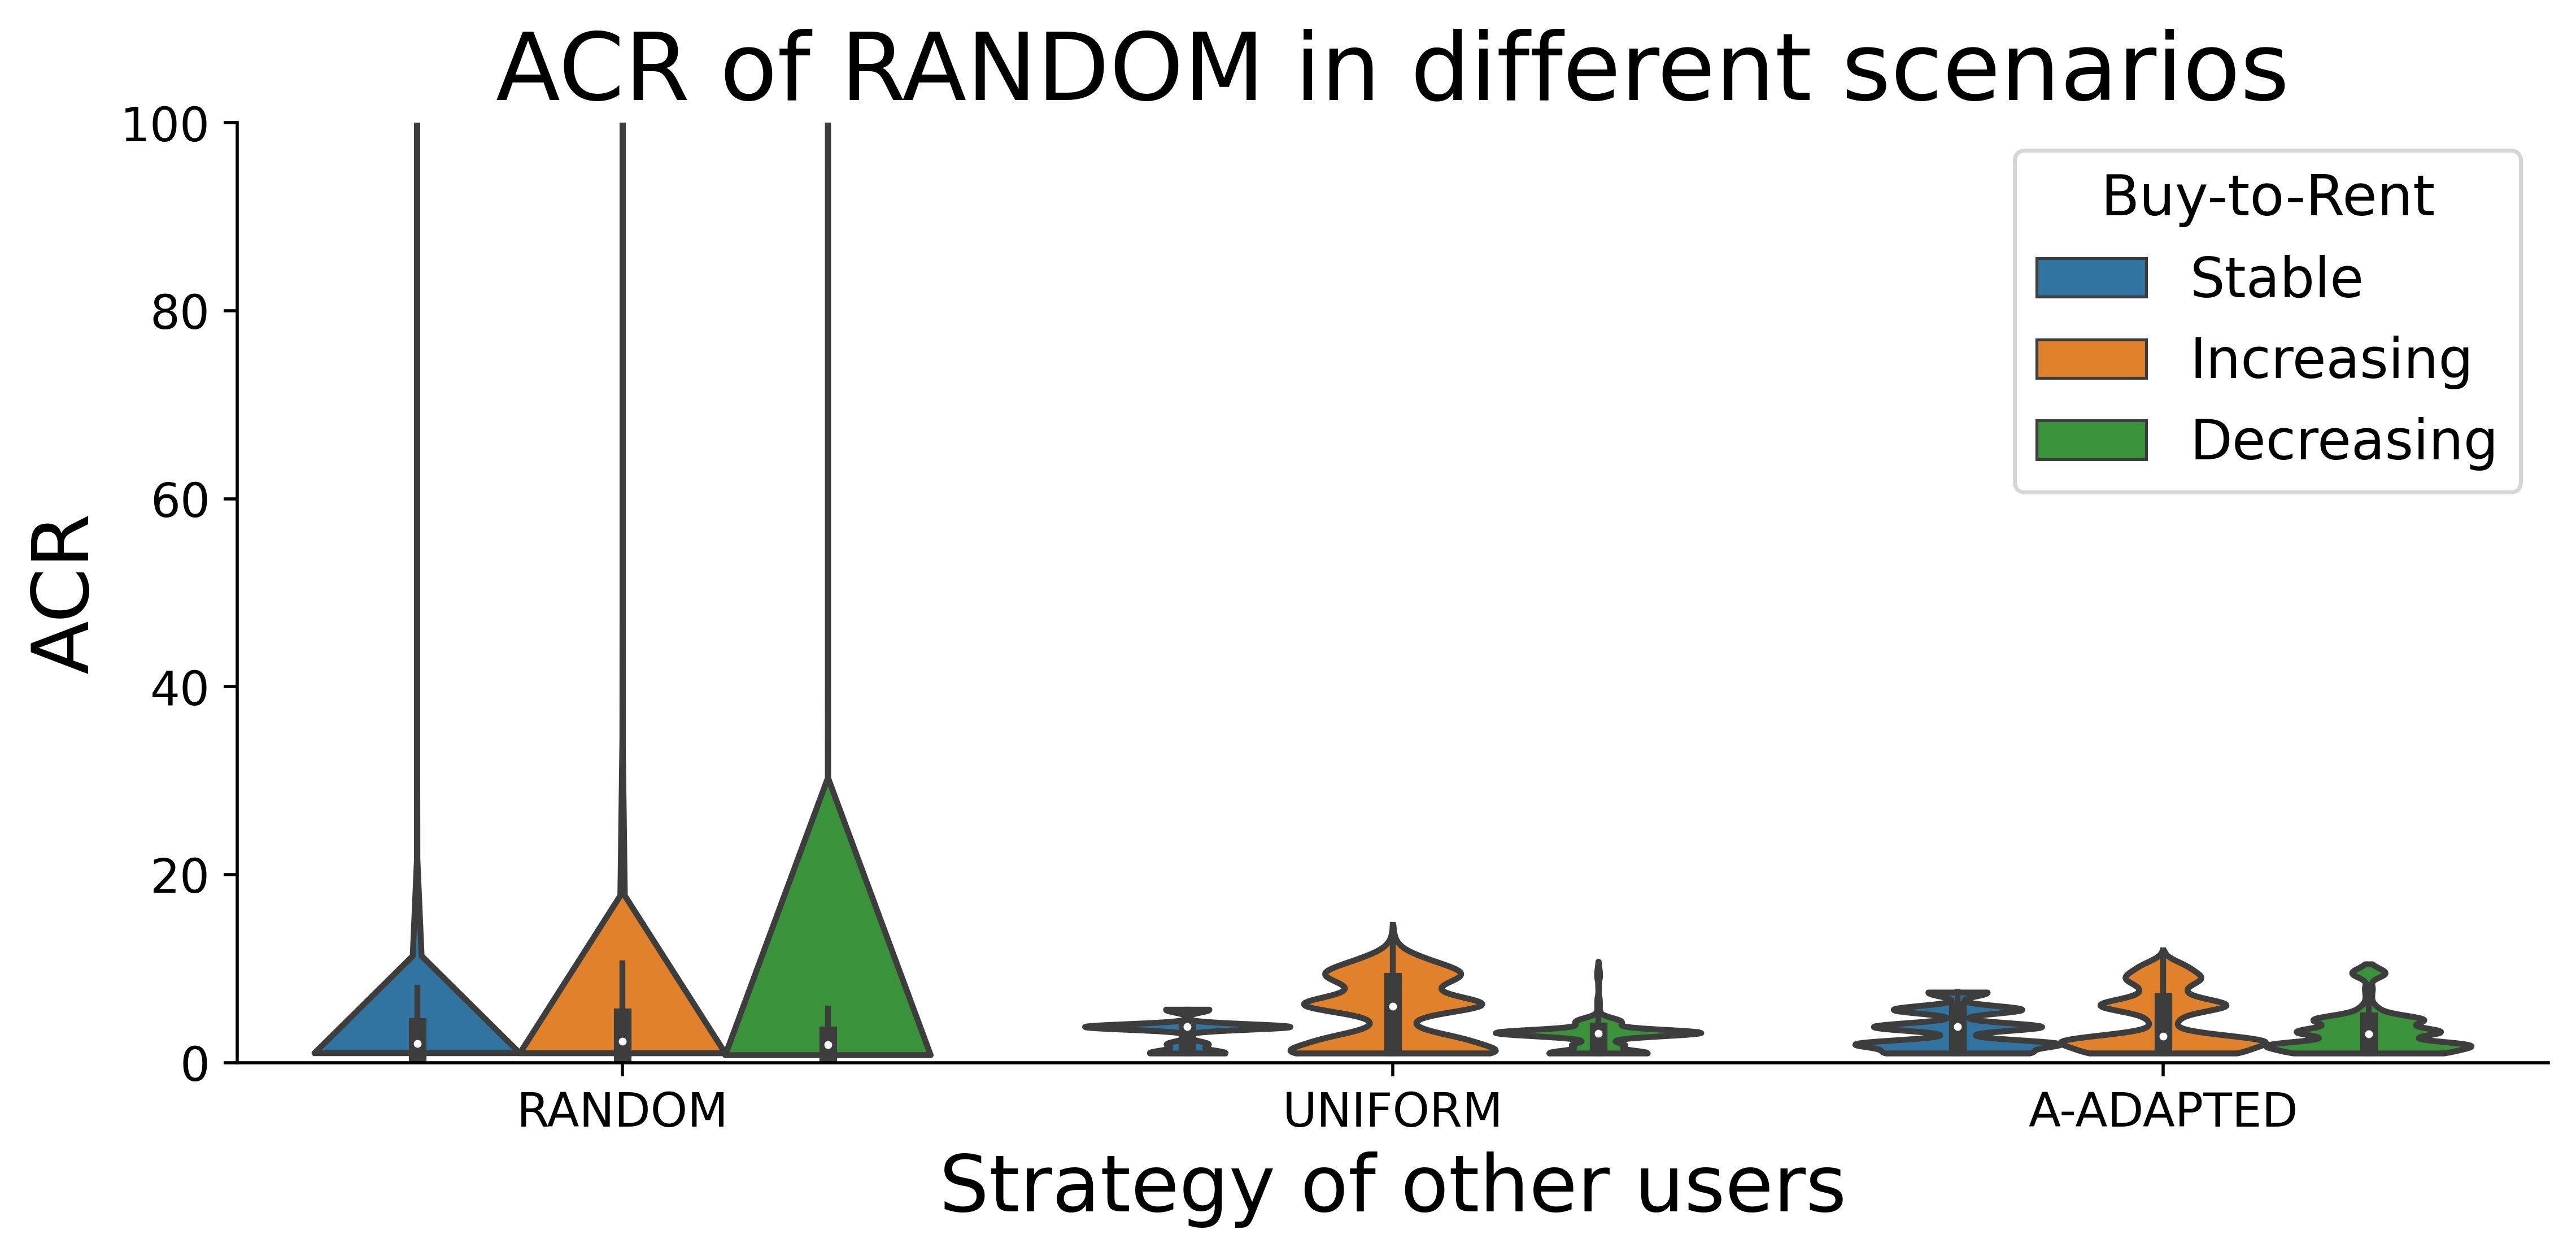

In [12]:
# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.rcParams['legend.title_fontsize'] = 'x-large'
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

_user_strategies = ["RANDOM"]
_user_strategy = "RANDOM"

# Set title
plt.title(
    f"ACR of {_user_strategy} in different scenarios", fontsize=24)

# Plot
sns.violinplot(ax=ax, x="user_strategies", y="main_user_CR",
               hue="price_trend", data=df_random, bw=.2,  cut=0, scale="width", alpha=0.4)

# Set labels etc.
ax.set_ylabel('ACR', fontsize=20)
ax.set_xlabel('Strategy of other users', fontsize=20)
ax.set_ylim(0,100)

labels = ["Stable", "Increasing", "Decreasing"]
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, fontsize=14, title="Buy-to-Rent")

sns.despine(offset=0, trim=False, left=False)

# plt.savefig("Model/Experiments/mas/output/img/mas-CR.pdf",
#             format="pdf", bbox_inches="tight")
